In [25]:
import sys

sys.path.insert(0, "..")
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

from src.laplacian_eigenmaps import LaplacianEigenmaps
from src.utils import load_mammoth_data

In [59]:
data_raw = load_mammoth_data()
# Remove 99,5% of the points in the dataset randomly
n = len(data_raw) * 0.005

# Create vector of random indices
np.random.seed(12)
random_indices = np.random.choice(len(data_raw), size=int(n), replace=False)
data = data_raw[random_indices]
colors = data[:, 2]  # Color by Z-axis value
print(data.shape)

Loading Mammoth 3D dataset...
Data shape: (999778, 3)
(4998, 3)


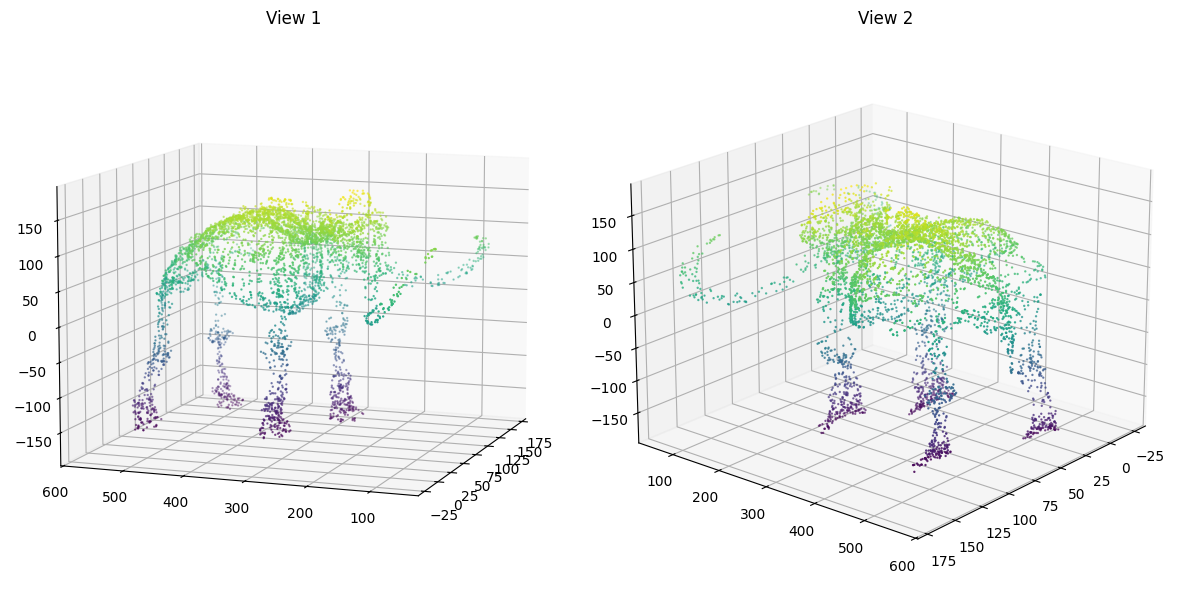

In [60]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1, projection="3d")
sc1 = ax1.scatter(
    data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap="viridis", s=0.5
)
ax1.set_title("View 1")
ax1.view_init(elev=10, azim=200)

ax2 = fig.add_subplot(1, 2, 2, projection="3d")
sc2 = ax2.scatter(
    data[:, 0], data[:, 1], data[:, 2], c=data[:, 2], cmap="viridis", s=0.5
)
ax2.set_title("View 2")
ax2.view_init(elev=20, azim=40)

plt.tight_layout()
plt.show()

In [61]:
# Perform dimensionality reduction using Laplacian Eigenmap, without UMAP
k = 10
le = LaplacianEigenmaps(
    n_components=2,
    n_neighbors=k,
    weight="binary",
)
embedding_le = le.fit_transform(data)

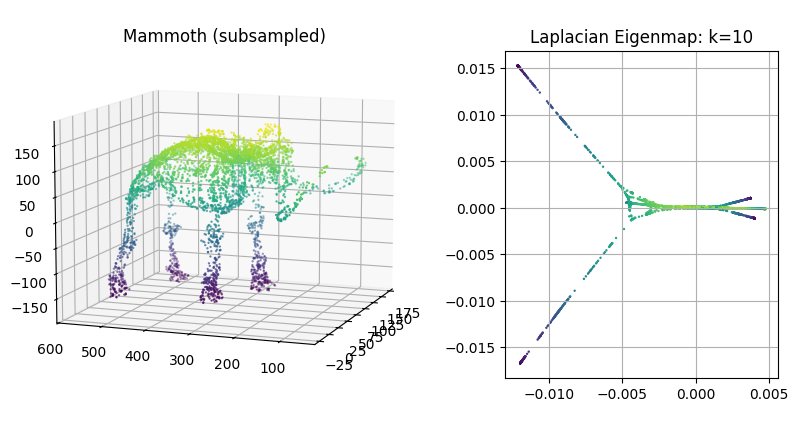

In [68]:
# Plot original 3D data and 2D embedding side by side with adjusted sizes
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(
    1, 2, width_ratios=[1.5, 1]
)  # Make the 3D plot twice as wide as the 2D plot

ax_mam = fig.add_subplot(gs[0], projection="3d")
ax_mam.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors, cmap="viridis", s=0.5)
ax_mam.set_title("Mammoth (subsampled)", y=0.98)
ax_mam.view_init(elev=10, azim=200)

ax_embed = fig.add_subplot(gs[1])
ax_embed.scatter(
    embedding_le[:, 0], embedding_le[:, 1], c=colors, cmap="viridis", s=0.5
)
ax_embed.set_title(f"Laplacian Eigenmap: k={k}", fontsize=12)
# ax_embed.set_aspect("equal")  # Set the aspect ratio to "equal"
# force square aspect ratio squeezing y axis
ax_embed.set_box_aspect(1.2)  # Set the box aspect ratio to 1:1
ax_embed.grid(True)

plt.tight_layout()
plt.show()